In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= 'darkgrid')

%matplotlib inline 

# Dataset
This dataset is from kaggle https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
Basically has that stats collected from various job titles including salary.
My intent is so explore which jobs are more lucrative in data science currently since I want to be within the industry.

# Loading dataset
The dataset has 12 features and 607 rows

In [2]:
df = pd.read_csv('ds_salaries.csv')

df.shape

(607, 12)

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Dropping
Column 1 'unnnamed:0' is just an index column and not too sure why it is included.
Salary_in_usd is the same as the salary column but better since it converts the salary into an amount that only my american brain can understand. Also will be filtering out duplicate rows and null values if any

In [4]:
df = df.drop(columns = ['Unnamed: 0','salary'])

In [5]:
df.duplicated().sum()

42

In [6]:
df = df.drop_duplicates()
df.shape

(565, 10)

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Dataset currently has 10 features and 565 rows after dropping

## basic stats on numeric columns
work_year has little deviation as it seems that this dataset was collected only for the years 2021 to 2022.
salary_in_usd has high deviation suggesting outliers
remote_ratio is a bit odd. it can only be three values and not continous. 0 for zero remote hours, 50 for some remote, 100 for fully remote. maybe this column is more categorical than numeric

In [8]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


# Correlation

Unfortunately, there are,basically, no correlation between the numeric columns.

<AxesSubplot:>

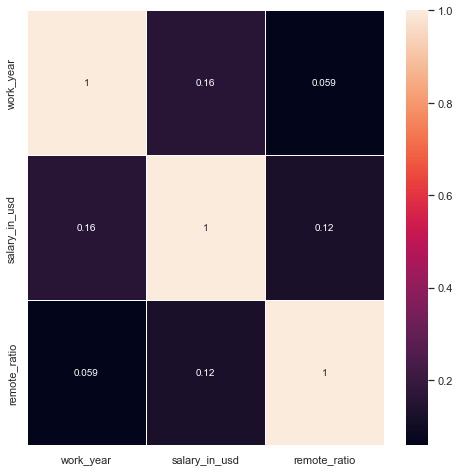

In [9]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True,linewidth =1)

# Pairplots
### plotting the scatterplots shows no correlation
### The only thing interesting to me is the distribution of salary usd.
### It has a normal distribution

<Figure size 1080x1080 with 0 Axes>

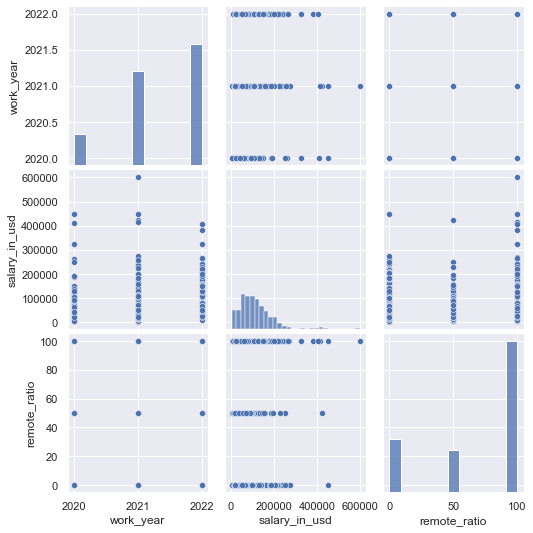

In [10]:
plt.figure(figsize=(15,15))
sns.pairplot(data = df)

# Salary in usd
### doing boxplots and histogram
There are outliers and the distribution is skewed to the right

<AxesSubplot:>

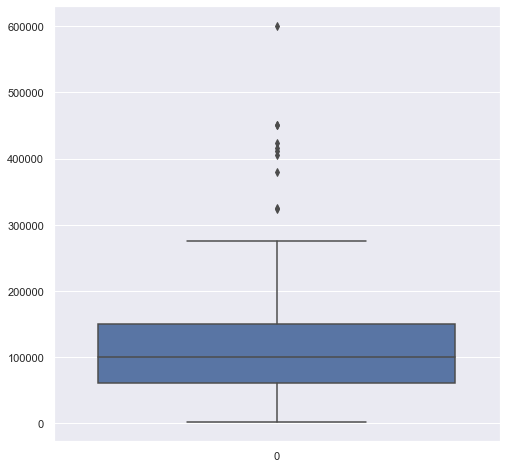

In [11]:
plt.figure(figsize = (8,8))
sns.boxplot(data = df['salary_in_usd'])

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

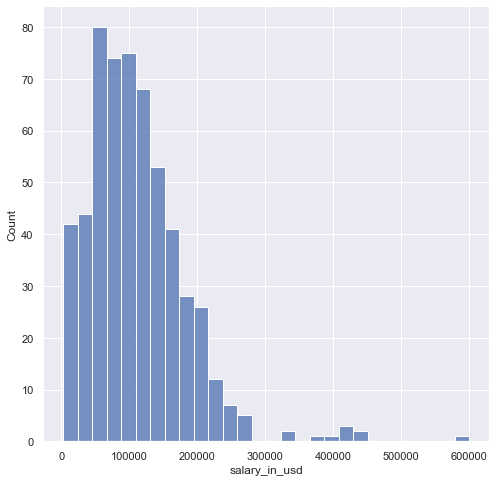

In [12]:
plt.figure(figsize = (8,8))
sns.histplot(data = df['salary_in_usd'])

# Outlier
### So it seems that that one outlier making 600 grand a year is a principal data engineer
### Therefore I should aim for that title

In [13]:
df.sort_values(by = 'salary_in_usd',ascending = False)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,USD,600000,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,USD,450000,US,100,US,L
33,2020,MI,FT,Research Scientist,USD,450000,US,0,US,M
157,2021,MI,FT,Applied Machine Learning Scientist,USD,423000,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,USD,416000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...
179,2021,MI,FT,Data Scientist,INR,5679,IN,100,US,S
77,2021,MI,PT,3D Computer Vision Researcher,INR,5409,IN,50,IN,M
185,2021,MI,FT,Data Engineer,USD,4000,IR,100,IR,M
238,2021,EN,FT,Data Scientist,USD,4000,VN,0,VN,M


# Country mean salary
### America pays the most on average for data science careers
### But america represents the most observations with the dataset so there is an imbalance and mean salary may not be accurate among countries

In [14]:
gb = df.groupby('salary_currency')
country = gb.salary_in_usd.mean().reset_index(name = 'mean').sort_values(by = 'mean',ascending = False)
country

,salary_currency,mean
16,USD,137007.353760
3,CHF,122346.000000
14,SGD,104176.500000
2,CAD,97222.888889
0,AUD,87064.000000
8,GBP,81744.116279
7,EUR,65598.913978
11,JPY,60921.333333
5,CNY,40283.500000
4,CLP,40038.000000


Text(0.5, 1.0, 'avg salary by country')

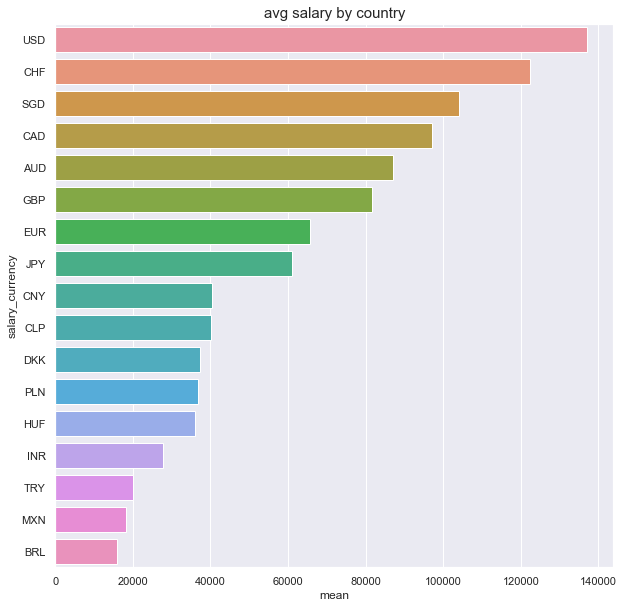

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(data = country, x = 'mean',y = 'salary_currency')
plt.title('avg salary by country',fontsize=15)

In [16]:
count = df.salary_currency.value_counts(normalize = True).mul(100).rename_axis('country').reset_index(name='percent')


Text(0.5, 1.0, 'observations within dataset')

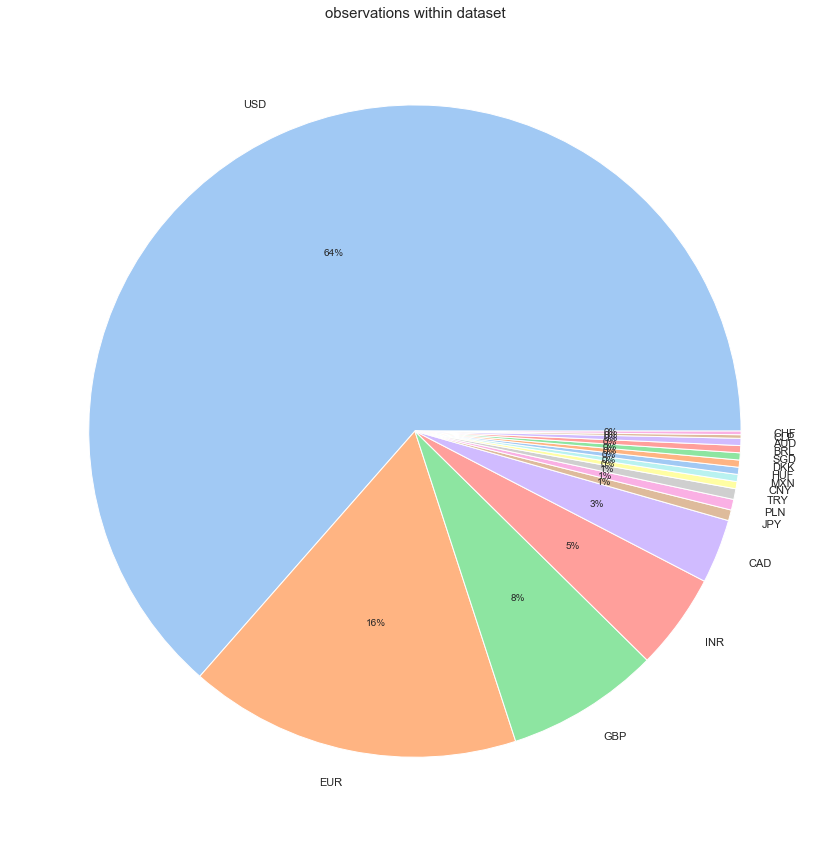

In [29]:
plt.figure(figsize = (15,15))
plt.pie(count['percent'],labels = count['country'],colors = sns.color_palette('pastel'),autopct='%.0f%%');
plt.title('observations within dataset',fontsize = 15)

# Job titles
### Exploring the average income among jobs, data analytics lead pays the most
### However there is only one observation for not only this jobs but for the top jobs within this dataset.

In [18]:
gb = df.groupby('job_title')
job = gb['salary_in_usd'].mean().reset_index(name = 'avg_income').sort_values(by = 'avg_income',ascending = False)
job

,job_title,avg_income
14,Data Analytics Lead,405000.000000
45,Principal Data Engineer,328333.333333
28,Financial Data Analyst,275000.000000
46,Principal Data Scientist,215242.428571
25,Director of Data Science,195074.000000
16,Data Architect,177873.909091
3,Applied Data Scientist,175655.000000
2,Analytics Engineer,175000.000000
23,Data Specialist,165000.000000
29,Head of Data,160162.600000


In [19]:
top_10 = job.head(10)
top_10

,job_title,avg_income
14,Data Analytics Lead,405000.000000
45,Principal Data Engineer,328333.333333
28,Financial Data Analyst,275000.000000
46,Principal Data Scientist,215242.428571
25,Director of Data Science,195074.000000
16,Data Architect,177873.909091
3,Applied Data Scientist,175655.000000
2,Analytics Engineer,175000.000000
23,Data Specialist,165000.000000
29,Head of Data,160162.600000


<AxesSubplot:xlabel='avg_income', ylabel='job_title'>

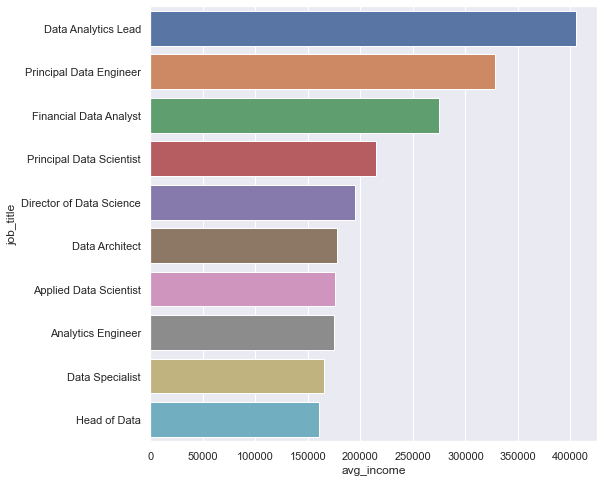

In [20]:
plt.figure(figsize = (8,8))
sns.barplot(data = top_10,x = 'avg_income',y = 'job_title')

In [21]:
analyst_lead = df[df['job_title']=='Data Analytics Lead']
analyst_lead.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
523,2022,SE,FT,Data Analytics Lead,USD,405000,US,100,US,L


In [22]:
jobs = df.job_title.value_counts(ascending = False)
jobs

Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [23]:
more_than_30 = jobs.head(4).index.tolist()
more_than_30

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer']

In [24]:
thirty = df[df.job_title.isin(more_than_30)].reset_index(drop = True)
thirty.head()



,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
2,2020,EN,FT,Data Analyst,USD,72000,US,100,US,L
3,2020,MI,FT,Data Scientist,HUF,35735,HU,50,HU,L
4,2020,EN,FT,Data Scientist,EUR,51321,FR,0,FR,S


### Therefore I choose jobs that has at least 30 observation because of the central limit theorem
### In the end there were only four jobs that met this criteria

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

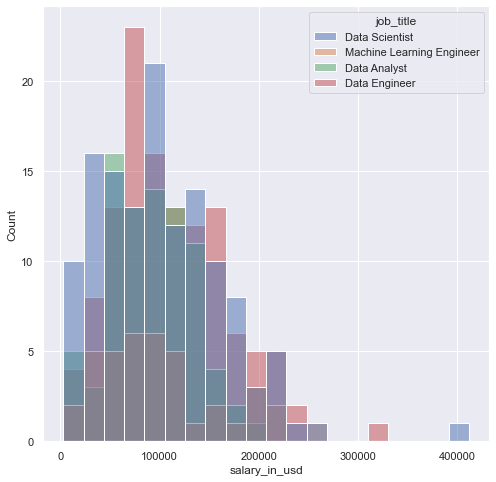

In [25]:
plt.figure(figsize = (8,8))
sns.histplot(data = thirty,x = 'salary_in_usd',hue = 'job_title')

# Conclusion
### I dont think I can use this dataset for ML because I am not sure what the target variable would be
### Maybe the job title but that would only include jobs that had at least 30 observations and would be a multi class classification
### However there are no independent features that would be good enough since I found no correlations between any of the numeric features.